In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import torchvision
import os
from PIL import Image

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
from constants import csv_file, directory, INPUT_SHAPE, YEAR, ext

from utils import Dataset_Diabetic, data_class
from utils import (
    plot_samples,
    get_dataloader,
    plot_confusion_matrix,
    calculate_confusion_matrix,
    accuracy_fn,
    accuracy_sickness,
    get_accuracies,
)
from model import train_loop

from model import Model_Retinopathy

from constants import EPOCHS, BATCH_SIZE, LEARNING_RATE, UPDATES

In [4]:
# MODEL STUFF

model = Model_Retinopathy().to(device)

loss_fn = nn.CrossEntropyLoss()
# Best loss function when talking about multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # Just use Adam bro

In [5]:
# DATA STUFF
df = pd.read_csv(csv_file)
train_df = df.sample(frac=0.9, random_state=200).reset_index(drop=True)
val_df = df.drop(train_df.index).reset_index(drop=True)

train_data, train_loader = get_dataloader(train_df, ext, directory, BATCH_SIZE, True)
val_data, val_loader = get_dataloader(val_df, ext, directory, BATCH_SIZE, False)

update_every = len(train_loader) // UPDATES

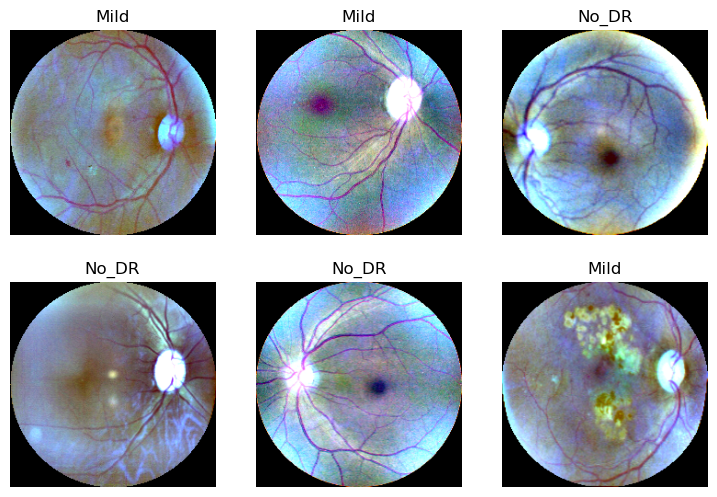

In [6]:
plot_samples(train_data, 2, 3)

In [7]:
losses = []
acc = []
total_acc = [0]
acc_val = [0]

In [8]:
train_loop(model, train_loader, val_loader, epochs=EPOCHS)

Epoch: 0
Batch #0: Loss:  1.64700 Accuracy:  0.1406 Accuracy sickness:  0.4219
Batch #13: Loss:  0.81830 Accuracy:  0.7656 Accuracy sickness:  0.9688
Batch #26: Loss:  0.69949 Accuracy:  0.7344 Accuracy sickness:  0.9375
Batch #39: Loss:  0.69996 Accuracy:  0.7656 Accuracy sickness:  0.9375
Batch #51: Loss:  0.41670 Accuracy:  0.8438 Accuracy sickness:  0.9688
RESULTS - Accuracy:  0.7130 Validation Accuracy:  0.7923
Epoch: 1
Batch #0: Loss:  0.48832 Accuracy:  0.7812 Accuracy sickness:  1.0000
Batch #13: Loss:  0.66136 Accuracy:  0.7500 Accuracy sickness:  0.9531
Batch #26: Loss:  0.51150 Accuracy:  0.8438 Accuracy sickness:  0.9531
Batch #39: Loss:  0.75754 Accuracy:  0.7188 Accuracy sickness:  0.9375
Batch #51: Loss:  0.42101 Accuracy:  0.8125 Accuracy sickness:  1.0000
RESULTS - Accuracy:  0.8149 Validation Accuracy:  0.8880
Epoch: 2
Batch #0: Loss:  0.39074 Accuracy:  0.8594 Accuracy sickness:  1.0000
Batch #13: Loss:  0.39039 Accuracy:  0.8438 Accuracy sickness:  0.9688
Batch #26:

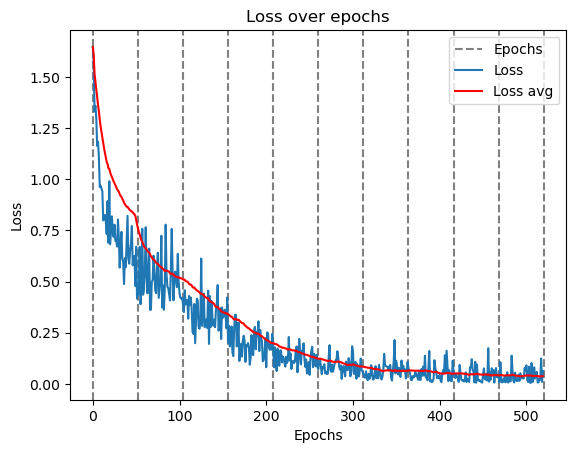

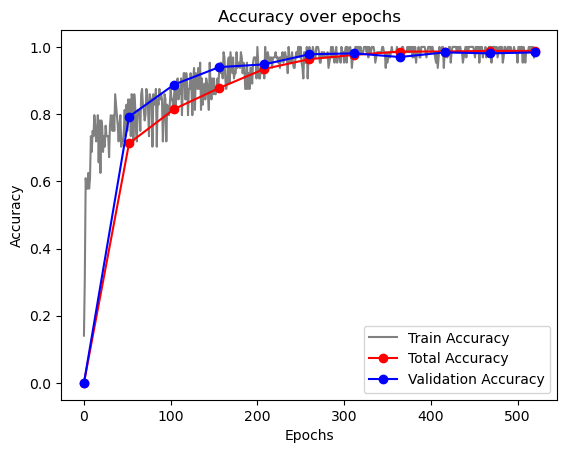

In [9]:
model.plot_loss()
model.plot_accuracy()

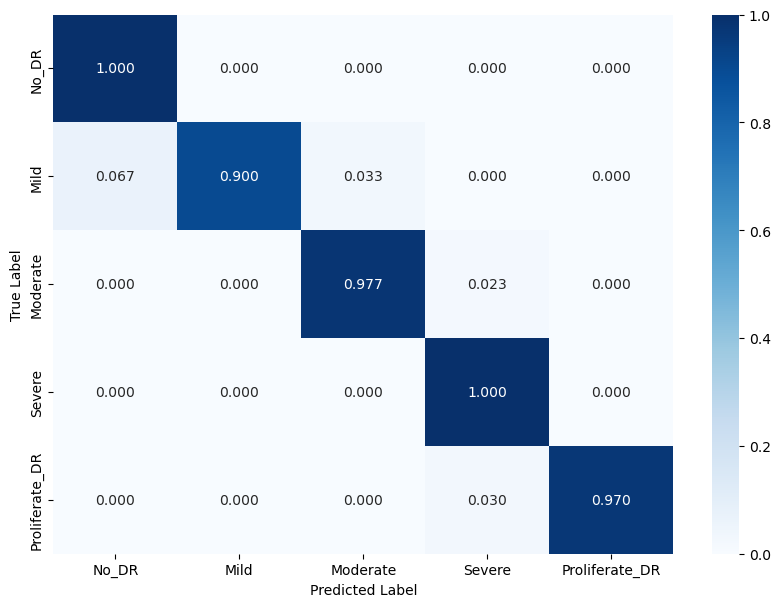

In [10]:
confusion_matrix = calculate_confusion_matrix(model, val_loader)
plot_confusion_matrix(confusion_matrix, data_class.values())

In [11]:
extra_year = 2015 if YEAR == 2019 else 2019
ext = "png" if extra_year == 2019 else "jpeg"
extra_dir = f"Data/Resized/preprocessed_{extra_year}_ben_color"
extra_csv = f"Data/Resized/train_{extra_year}.csv"
extra_df = pd.read_csv(extra_csv)

extra_data, extra_loader = get_dataloader(extra_df, ext, extra_dir, BATCH_SIZE, False)

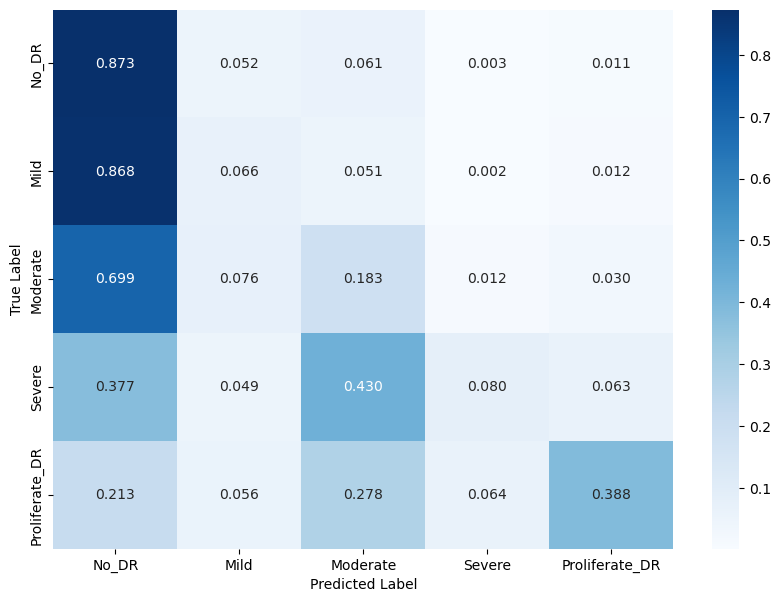

In [12]:
confusion_matrix = calculate_confusion_matrix(model, extra_loader)
plot_confusion_matrix(confusion_matrix, data_class.values())

In [13]:
print(get_accuracies(model, extra_loader))

(0.6838042611370628, 0.7276119402985075)


In [14]:
print(get_accuracies(model, val_loader))

(0.9836065573770492, 0.994535519125683)


In [15]:
print(get_accuracies(model, train_loader))

(0.9908980582524272, 0.9990898058252428)


In [16]:
torch.save(model.state_dict(), "model.pth")